
# Project: Investigating FBI Gun Dataset 
#### (Source: Github)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The FBI conducts checks on prospective firearm buyers prior to their purchase. Information regarding buyers is usually relayed through the seller to the National Instant Criminal Background Check System (NCIS) staff that performs the background check to confirm whether or not this buyer is eligible. The FBI has provided data on number of firearms by month, state and type covering the period from November 1998 – January 2021.

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline


### Questions to investigate:
- **What kind of gun do prospective buyers are interested in buying when making a purchase?**
- **Which US state has the highest number of permits issued by NICS?**
- **Does level of education affect gun purchases across states?**
- **What are the states with the highest gun per capita? Is there any noticeable change in this ratio between the years 2010 and 2016?**

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, there will be a number of steps followed. Firstly, data will be loaded as dataframes from their sources files. Data will then be checked for cleanliness and then trimmed in preparation for the Exploratory Data Analysis (EDA) part.

### Loading data

In [5]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.


In [6]:
df_gun = pd.read_excel('gun_data.xlsx')

In [7]:
df_census = pd.read_csv('U.S. Census Data.csv')

### Assessing data - visually & programmatically

In [8]:
df_gun.head(3)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394


In [9]:
df_gun.tail()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12480,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
12481,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
12482,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
12483,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241
12484,1998-11,Wyoming,8.0,NaN,45.0,49.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107


In [10]:
df_census.head(3)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%


It can be seen that the fact column should be transposed as each column should hold only one kind of information and hence indicate what those figures represent in this case.

In [11]:
df_gun.shape

(12485, 27)

In [12]:
df_census.shape

(85, 52)

In [13]:
df_gun.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [14]:
df_census.describe()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,F,(c),58.00%,7.30%,50.30%,50.90%,50.30%,3.30%,5.70%,51.60%,...,20411059,0.048,50.40%,2.50%,"625,741",64.70%,"$31,762",1.50%,50.30%,7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


In [15]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [16]:
df_gun[['month','prepawn_long_gun','prepawn_other','redemption_handgun']].sample(3)

,month,prepawn_long_gun,prepawn_other,redemption_handgun
5847,2008-11,3.0,NaN,287.0
10518,2001-10,4.0,NaN,13.0
2803,2013-07,3.0,0.0,87.0


In [17]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [18]:
df_cen_index = df_census.Fact.tolist()

In [19]:
len(df_cen_index)

85

>Important to note that there are 85 column headers where the majority of them are unnecessary

- Checking data type of fields in the df_census dataset 

In [20]:
type(df_census['Utah'][1])

str

>The data is stored in string format, which is an incorrect data type hence needs to be converted into integers to facilitate data filtering and extraction.

- Adding the state names in column headers of the df_census dataset to a single list by excluding first two column headers in df_census

In [21]:
state_names = list(df_census.columns)
state_names = state_names[2:]
len(state_names)

50

Since the total number of states in the US is 50, the state_names list includes exactly all of the states. 

>*Exploring further, number of distinct states in the states column found in the df_gun dataset needs to be determined to check if both numbers match.*

In [22]:
df_gun.state.nunique()

55

In [23]:
df_gun_states = df_gun.groupby('state').sum().index

In [24]:
len(df_gun_states)

55

>Number of states in df_gun dataset does not match the number of US states, 50, which is found in the df_census dataset indicating that there may be extra colonies/territories counted as states.

- Identifying duplicate rows and where they are in both datasets

In [25]:
df_gun.duplicated().sum()

0

In [26]:
df_census.duplicated().sum()

3

In [27]:
# Getting all the duplicated items in df_census
df_census[df_census.duplicated(keep=False)]

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Checking for missing values and calculating how many are there in both datasets.

In [28]:
df_gun.isnull().sum().sum()

154595

In [29]:
df_census.isnull().sum().sum()

1062

In [30]:
df_census.columns

Index(['Fact', 'Fact Note', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [31]:
df_gun[df_gun.permit_recheck.isnull()]

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
1100,2016-01,Alabama,27242.0,NaN,25445.0,14785.0,1266.0,884,0.0,8.0,...,0.0,NaN,NaN,16.0,15.0,2.0,0.0,1.0,0.0,73218
1101,2016-01,Alaska,192.0,NaN,2859.0,2245.0,300.0,164,0.0,5.0,...,0.0,NaN,NaN,2.0,0.0,0.0,0.0,1.0,0.0,6085
1102,2016-01,Arizona,3898.0,NaN,15745.0,8512.0,1107.0,575,0.0,7.0,...,0.0,NaN,NaN,10.0,9.0,2.0,4.0,2.0,0.0,31910
1103,2016-01,Arkansas,3670.0,NaN,7954.0,5982.0,305.0,340,0.0,11.0,...,0.0,NaN,NaN,3.0,6.0,1.0,1.0,0.0,0.0,20437
1104,2016-01,California,127715.0,NaN,52139.0,32970.0,7054.0,0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,220912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12480,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
12481,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
12482,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
12483,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241


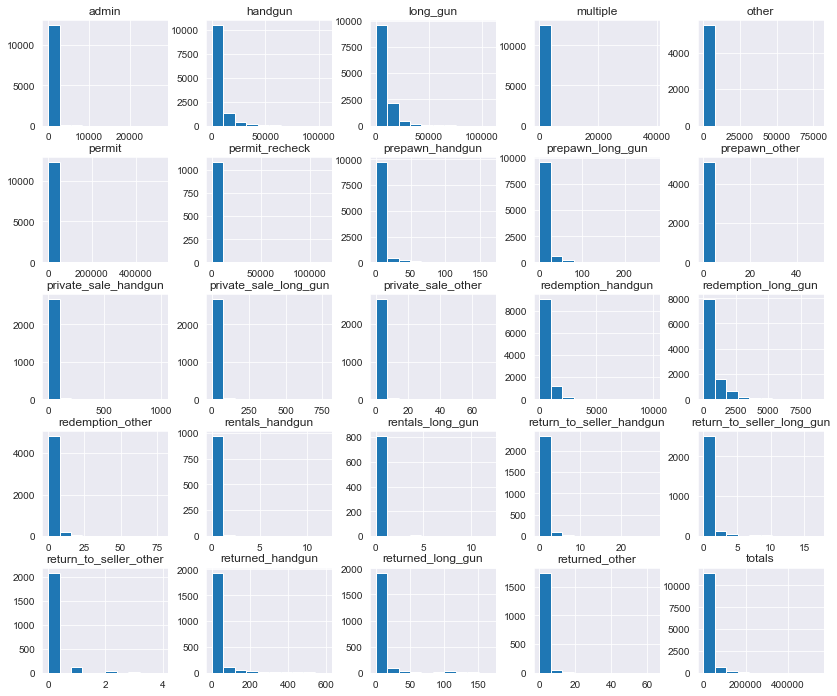

In [32]:
# Visual assessment
sns.set_style("darkgrid")
df_gun.hist(figsize=(14,12));

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).



After discussing the structure of the data and any problems that need to be
   cleaned, perform those cleaning steps in the second part of this section.


## Data Cleaning
Following the assessment of data and its properties, problems identified will be handled prior to making any analysis. In this section, all steps performed will be explained and justified.

    Both datasets appear to have quality (i.e. completeness, validity, etc.) and tidiness (i.e. structural) issues that were identified in the data wrangling part and needs to be addressed. Issues that will be fixed are ordered:
        1. Converting erroneous data types to be able to perform arithmetic operations of numerical data
        2. Transposing Fact column reflecting it with the column headers (state names in this case)
        3. Standardize all percentage figures in percentage columns
        4. Remove extra US colonies so that states column is identical in both datasets
        5. Extracting month and year from month column in dfg
        6. Removing any duplicates that were previously found
        7. Filling missing values in dfg dataset

### Prior to making any amendments to the data, copies of the datasets will be made to avoid making permenant changes to the original datasets.

In [33]:
dfg = df_gun.copy()

In [34]:
dfc = df_census.copy()

    1. Modifying misrepresented census data as string type by converting it to float data type through extracting numbers

In [35]:
states = list(dfc.columns[2:])

In [36]:
len(states)

50

In [37]:
for state in states:
    dfc[state].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
    dfc[state]=pd.to_numeric(dfc[state], downcast='float', errors='ignore')

**Test:** Checking to see if the numbers have been extracted from string format and data type has successfully been changed from str to float

In [38]:
dfc.head(4)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,4863300.0,741894.0,6931071.0,2988248.0,39250016.0,5540545.0,3576452.0,952065.0,...,865454.0,6651194.0,27862596.0,3051217.0,624594.0,8411808.0,7288000.0,1831102.0,5778708.0,585501.0
1,"Population estimates base, April 1, 2010, (V2...",NaN,4780131.0,710249.0,6392301.0,2916025.0,37254520.0,5029324.0,3574114.0,897936.0,...,814195.0,6346298.0,25146100.0,2763888.0,625741.0,8001041.0,6724545.0,1853011.0,5687289.0,563767.0
2,"Population, percent change - April 1, 2010 (es...",NaN,170.0,450.0,840.0,250.0,540.0,1020.0,10.0,600.0,...,63.0,48.0,1080.0,1040.0,20.0,510.0,840.0,120.0,160.0,390.0
3,"Population, Census, April 1, 2010",NaN,4779736.0,710231.0,6392017.0,2915918.0,37253956.0,5029196.0,3574097.0,897934.0,...,814180.0,6346105.0,25145560.0,2763885.0,625741.0,8001024.0,6724540.0,1852994.0,5686986.0,563626.0


In [39]:
type(dfc['Alaska'][1])

numpy.float32

    2. Transposing the df_census dataset so that the headers clearly describe what the figures indicate. Moreover, only the relevant records will be retained.

In [8]:
# Creating a function that drops unnecassary columns
def dropcol(dframe,column):
    dframe.drop([column],axis=1,inplace=True)

In [ ]:
# Start by dropping Fact Note column
dropcol(dfc,'Fact Note')

In [41]:
# Drop columns rows that are not needed in further analysis
dfc = dfc.drop(dfc.index[65:])

In [42]:
# Transpose census data by setting Fact column to be index then diagonally reflecting it with current column headers
dfc.set_index('Fact',inplace = True)

In [43]:
dfc = dfc.T

In [44]:
# Renaming index column to state
dfc.rename(columns={"Fact":"state"},inplace=True)

In [45]:
# Finding where missing data is
dfc.columns[dfc.isnull().any()].tolist()

['Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)',
 'Total manufacturers shipments, 2012 ($1,000)',
 'Total employment, percent change, 2014-2015']

**Test:** Checking that table has been transposed and changes have been carried out

In [46]:
dfc.head(2)

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
Alabama,4863300.0,4780131.0,170.0,4779736.0,600.0,640.0,2260.0,2370.0,1610.0,1380.0,...,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,944.0,5064533.0,1.0
Alaska,741894.0,710249.0,450.0,710231.0,730.0,760.0,2520.0,2640.0,1040.0,770.0,...,68032.0,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0,12.0,57064096.0,2.0


    3. Fixing percentage figures that are not accurate. Percentage columns will be divided through by a 100

In [47]:
# Filtering percentage columns
dfcp=dfc.filter(regex='percent').columns.tolist()

In [48]:
# Fixing percentage figures that need to be divided by a 100
for i in dfcp:
    dfc[i] = dfc[i]/100

**Test:** Checking that percentage columns have been divided by a 100

In [49]:
dfc.head(1)

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
Alabama,4863300.0,4780131.0,1.7,4779736.0,6.0,6.4,22.6,23.700001,16.1,13.8,...,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,944.0,5064533.0,1.0


    4. Removing extra US colonies/territories that exist in the state column in the df_gun dataset

In [50]:
# Identifying states that requires removal
for state in df_gun_states:
    if state not in state_names:
        print(state)

District of Columbia
Guam
Mariana Islands
Puerto Rico
Virgin Islands


In [51]:
dfg = dfg[dfg.state != 'District of Columbia']
dfg = dfg[dfg.state != 'Guam']
dfg = dfg[dfg.state != 'Mariana Islands']
dfg = dfg[dfg.state != 'Puerto Rico']
dfg = dfg[dfg.state != 'Mariana Islands']

**Test:** Checking that modifications are implemented and if these territories still exist in the dataset

In [52]:
print('District of Columbia' in dfg)
print('Guam' in dfg)
print('Mariana Islands' in dfg)
print('Puerto Rico' in dfg)
print('Mariana Islands' in dfg)

False
False
False
False
False


    5. Splitting the month column, which contains both the month and year, into two distinct columns; month and year

In [53]:
dfg['year'] = dfg['month'].apply(lambda x: int(x.split("-")[0]))
dfg['month'] = dfg['month'].apply(lambda x: int(x.split("-")[1]))

In [54]:
# Moving the newly created column, year, to the front next to month column
year = dfg['year']
dropcol(dfg,'year')
dfg.insert(1,'year',year)

**Test:** Ensure that there are 2 different columns for month and year respectively and that they are at the front of the table

In [55]:
dfg.head(1)

,month,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,9,2017,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019


    6. Dropping duplicated rows that were found in the df_census dataset

In [56]:
dfc.drop_duplicates(inplace=True)

**Test:** Verify that all duplicated records have been removed

In [57]:
dfc.duplicated().sum()

0

    7. Missing values in dfg

In [58]:
dfg.fillna(0,inplace=True)

**Test:** Checking to see that null values had been removed

In [222]:
dfg.isnull().sum().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis

> Now that data is cleaned, next step is to investigate and explore what relationships there are in the dataset via creating visualizations to address the questions posed at the beginning of this report. 

### Research Question 1: What kind of gun do buyers prefer when purchasing?
> Aim is to find what the preferance is among buyers between handgun and long gun over the years

In [59]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
dfg.year.describe()

count    11577.000000
mean      2007.792952
std          5.468313
min       1998.000000
25%       2003.000000
50%       2008.000000
75%       2013.000000
max       2017.000000
Name: year, dtype: float64

In [60]:
dfg.columns.tolist() 

['month',
 'year',
 'state',
 'permit',
 'permit_recheck',
 'handgun',
 'long_gun',
 'other',
 'multiple',
 'admin',
 'prepawn_handgun',
 'prepawn_long_gun',
 'prepawn_other',
 'redemption_handgun',
 'redemption_long_gun',
 'redemption_other',
 'returned_handgun',
 'returned_long_gun',
 'returned_other',
 'rentals_handgun',
 'rentals_long_gun',
 'private_sale_handgun',
 'private_sale_long_gun',
 'private_sale_other',
 'return_to_seller_handgun',
 'return_to_seller_long_gun',
 'return_to_seller_other',
 'totals']

In [61]:
# Sum of handgun purchases
dfg['handgun_total'] = dfg.handgun + dfg.private_sale_handgun

In [62]:
# Sum of long gun purchases
dfg['long_gun_total'] = dfg.long_gun + dfg.private_sale_long_gun

In [63]:
gun_type_years = dfg[['year','handgun_total','long_gun_total']].groupby('year').sum()
gun_type_years

,handgun_total,long_gun_total
year,,
1998,219595.0,582682.0
1999,2532511.0,5216320.0
2000,2187581.0,4778762.0
2001,2161166.0,4941982.0
2002,1838240.0,4407866.0
2003,1844597.0,4381438.0
2004,1984064.0,4505326.0
2005,2234206.0,4582780.0
2006,2434333.0,4787703.0


In [64]:
yearlist=((dfg.year.value_counts()).index).tolist()
yearlist.sort()

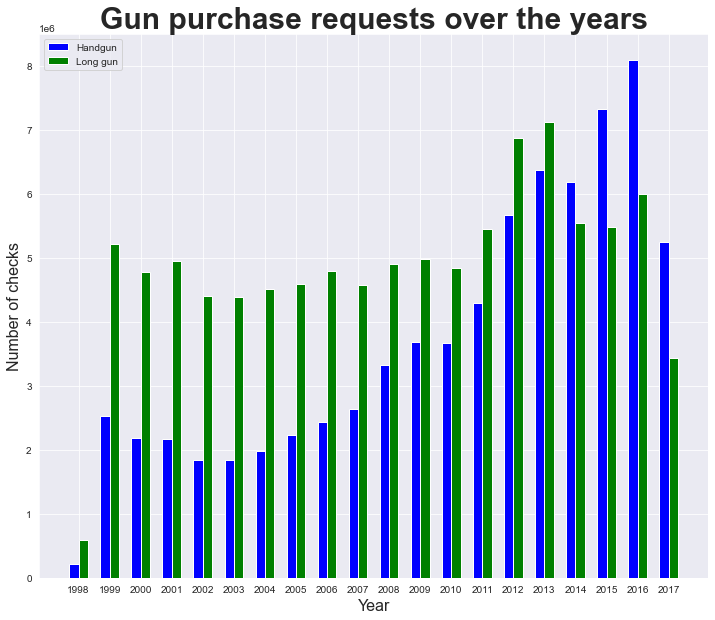

In [65]:
w = 0.3
x=np.arange(len(yearlist))
fig,ax=plt.subplots(figsize=(12,10))
labels = yearlist

ax.bar(x-w/2, gun_type_years.handgun_total, width=w, color='b',label='Handgun')
ax.bar(x+w/2, gun_type_years.long_gun_total, width=w, color='g',label='Long gun')
plt.xlabel('Year',fontsize=16)
plt.ylabel('Number of checks',fontsize=16)
plt.title('Gun purchase requests over the years',fontsize=30,fontweight='bold');
ax.set_xticklabels(labels)
ax.set_xticks(x)
ax.legend()
plt.show();

Figure 1: Bar chart above displays the demand for handguns and long guns over the period between 1998 until 2017



**OBSERVATIONS:** 
- It is quite clear that there is an increasing demand for all kinds of guns overall
- Prospective buyers appear to have preferred long guns from the year 1998 until 2013
- Demand for handguns surpassed that of long guns starting from the year 2014 and onwards

### Research Question 2: Which US state has the highest number of permits issued by NICS?
> Aim is to discover where the highest number of permits were issued across the US

In [66]:
permits = dfg[['state','permit']].groupby('state').sum().sort_index()
permits

,permit
state,
Alabama,1047441.0
Alaska,13352.0
Arizona,710509.0
Arkansas,507951.0
California,6530543.0
Colorado,426970.0
Connecticut,1595270.0
Delaware,22720.0
Florida,1088802.0


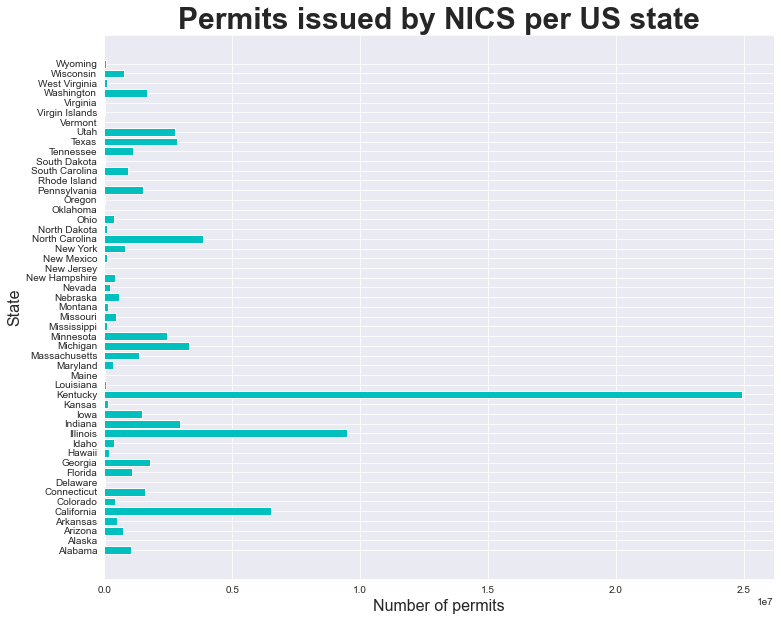

In [67]:
plt.figure(figsize=(12,10))
plt.barh(permits.index,permits.permit,color='c')
plt.xlabel('Number of permits',fontsize=16)
plt.ylabel('State',fontsize=16)
plt.title('Permits issued by NICS per US state',fontsize=30,fontweight='bold');

<center>Figure 2: Permits issued by NICS to population per state </center>

**OBSERVATIONS:**
- Figure 2 depicts the states where most people have permits and that most permits issued were in Kentucky, followed by Illinois, California, Michigan and Indiana in that order
- Some states, such as New Jersey, Main, Delaware, Alaska, Oregon and Oklahoma are close to or zero. This may be because of low to no tendancy to purchase firearms in these areas. It can also be due to missing data, limitations in data, etc.


### Research Question 3: Does higher education affect gun purchases?
> Aim is to reveal the relationship between NICS checks conducted and education level of prospective buyer where buyer has completed a Bachelor's degree or higher

In [68]:
# Grouping age columns
dfc.columns.tolist()

['Population estimates, July 1, 2016,  (V2016)',
 'Population estimates base, April 1, 2010,  (V2016)',
 'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
 'Population, Census, April 1, 2010',
 'Persons under 5 years, percent, July 1, 2016,  (V2016)',
 'Persons under 5 years, percent, April 1, 2010',
 'Persons under 18 years, percent, July 1, 2016,  (V2016)',
 'Persons under 18 years, percent, April 1, 2010',
 'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
 'Persons 65 years and over, percent, April 1, 2010',
 'Female persons, percent,  July 1, 2016,  (V2016)',
 'Female persons, percent, April 1, 2010',
 'White alone, percent, July 1, 2016,  (V2016)',
 'Black or African American alone, percent, July 1, 2016,  (V2016)',
 'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
 'Asian alone, percent, July 1, 2016,  (V2016)',
 'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)',
 'Tw

In [69]:
educationdf = dfc[['Language other than English spoken at home, percent of persons age 5 years+, 2011-2015',
 'High school graduate or higher, percent of persons age 25 years+, 2011-2015',
 "Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015"]]

In [70]:
educationdf.head(1)

Fact,"Language other than English spoken at home, percent of persons age 5 years+, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015"
Alabama,5.2,84.300003,23.5


In [71]:
educationlist = educationdf.index.tolist()

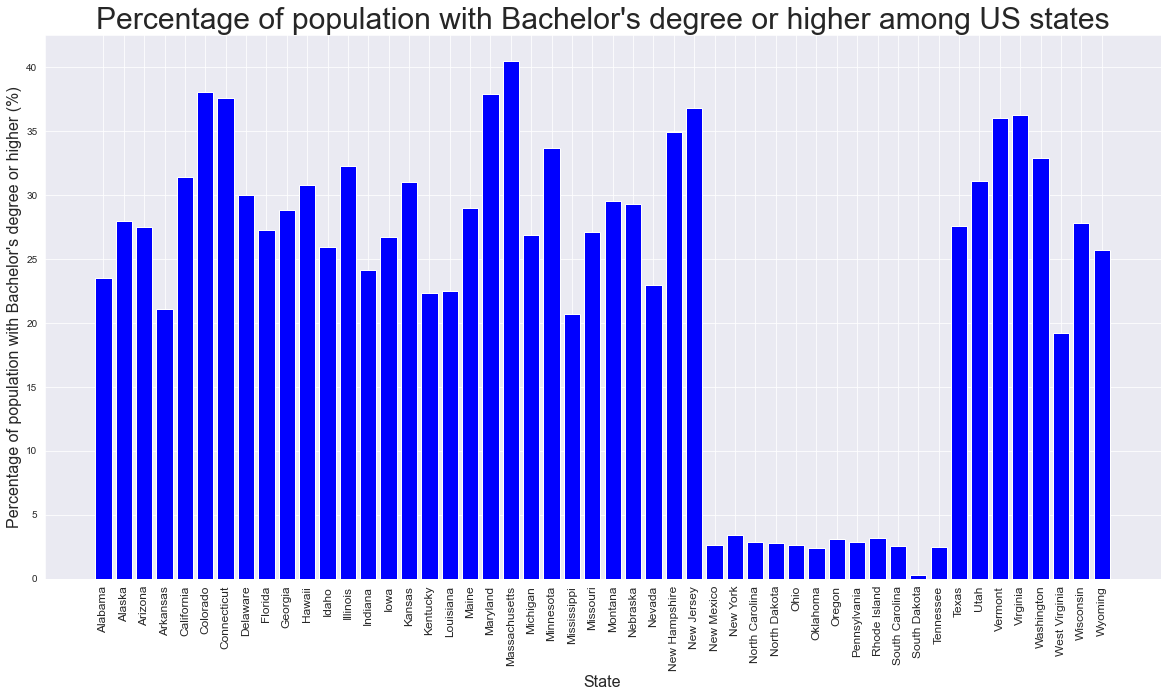

In [72]:
plt.figure(figsize=(20,10))
plt.bar(educationdf.index,educationdf["Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015"],color='b')
plt.xlabel('State',fontsize=16)
plt.ylabel('Percentage of population with Bachelor\'s degree or higher (%)',fontsize=16)
plt.title('Percentage of population with Bachelor\'s degree or higher among US states',fontsize=30)
plt.xticks(rotation=90,fontsize='12')
plt.show();

<center>Figure 3: State populations holding Bachelor's degree or higher</center>

**OBSERVATIONS:**
- There are big contrasts between state populations holding Bachelor's degree where some are high while some other are average or very low with the highest being Massachusetts, Colorado, Maryland and Virginia.
- Upon studying both figure 2 and 3, it can be deduced that states with high percentange of population holding bachelor's degree or higher has relatively lower number of gun purchase requests and hence less firearms overall.

In [73]:
# Scatter plot 2D visuals

### Research Question 4: What are the states with highest gun per capita? Was there any noticeable change in this ratio between 2010 and 2016?
> In this part, both datasets will  be merged on the state column as state population is required to deduce the number of firearms per person in each state. The approach will also compare the ratio of gun per capita in each state in the years **2010** and **2016** since a population estimate is given for these two years

In [108]:
dfg = dfg[dfg.state != 0]
dfg.head()

,month,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,handgun_total,long_gun_total
0,9,2017,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,...,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019,5743.0,6336.0
1,9,2017,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,...,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303,2337.0,2954.0
2,9,2017,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,...,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394,11101.0,7958.0
3,9,2017,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,...,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747,4360.0,6086.0
4,9,2017,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506,37165.0,24581.0


In [164]:
# Filtering all rows by the year 2016
dfg2010 = dfg.query("year==2010")
dfg2016 = dfg.query("year==2016")

In [165]:
dfg_group10 = dfg2010[['state','permit','totals']].groupby('state').sum()
dfg_group10.rename(columns={"totals":"totals10"},inplace=True)
dfg_group10.drop(['Virgin Islands'],inplace=True)
dfg_group10

,permit,totals10
state,,
Alabama,4621.0,308607
Alaska,0.0,65909
Arizona,24751.0,206050
Arkansas,31305.0,191448
California,295252.0,816399
Colorado,12928.0,300820
Connecticut,90942.0,179595
Delaware,0.0,19240
Florida,35.0,559347


In [167]:
dfg_group16 = dfg2016[['state','permit','totals']].groupby('state').sum()
dfg_group16.rename(columns={"totals":"totals16"},inplace=True)
dfg_group16.drop(['Virgin Islands'],inplace=True)
dfg_group16

,permit,totals16
state,,
Alabama,291039.0,616947
Alaska,3121.0,87647
Arizona,87771.0,416279
Arkansas,55456.0,266014
California,1036981.0,2377167
Colorado,85087.0,540514
Connecticut,148949.0,317692
Delaware,8440.0,59430
Florida,337086.0,1435340


In [168]:
# Merging census and gun data using inner join on state column
dfg_group10.reset_index()
dfg_group16.reset_index()

,state,permit,totals16
0,Alabama,291039.0,616947
1,Alaska,3121.0,87647
2,Arizona,87771.0,416279
3,Arkansas,55456.0,266014
4,California,1036981.0,2377167
5,Colorado,85087.0,540514
6,Connecticut,148949.0,317692
7,Delaware,8440.0,59430
8,Florida,337086.0,1435340
9,Georgia,233115.0,612985


In [169]:
dfc['state'] = dfc.index
masterdf = dfg_group10.merge(dfg_group16,on='state',how='inner').merge(dfc,on='state',how='inner')

In [170]:
masterdf.shape

(50, 70)

In [171]:
masterdf.filter(regex='Population').columns.tolist()

['Population estimates, July 1, 2016,  (V2016)',
 'Population estimates base, April 1, 2010,  (V2016)',
 'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
 'Population, Census, April 1, 2010',
 'Population per square mile, 2010']

In [173]:
masterdf['gun_per_capita10'] = masterdf['totals10']/masterdf['Population estimates base, April 1, 2010,  (V2016)']
masterdf['gun_per_capita16'] = masterdf['totals16']/masterdf['Population estimates, July 1, 2016,  (V2016)']

In [176]:
masterdf.set_index('state',inplace = True)

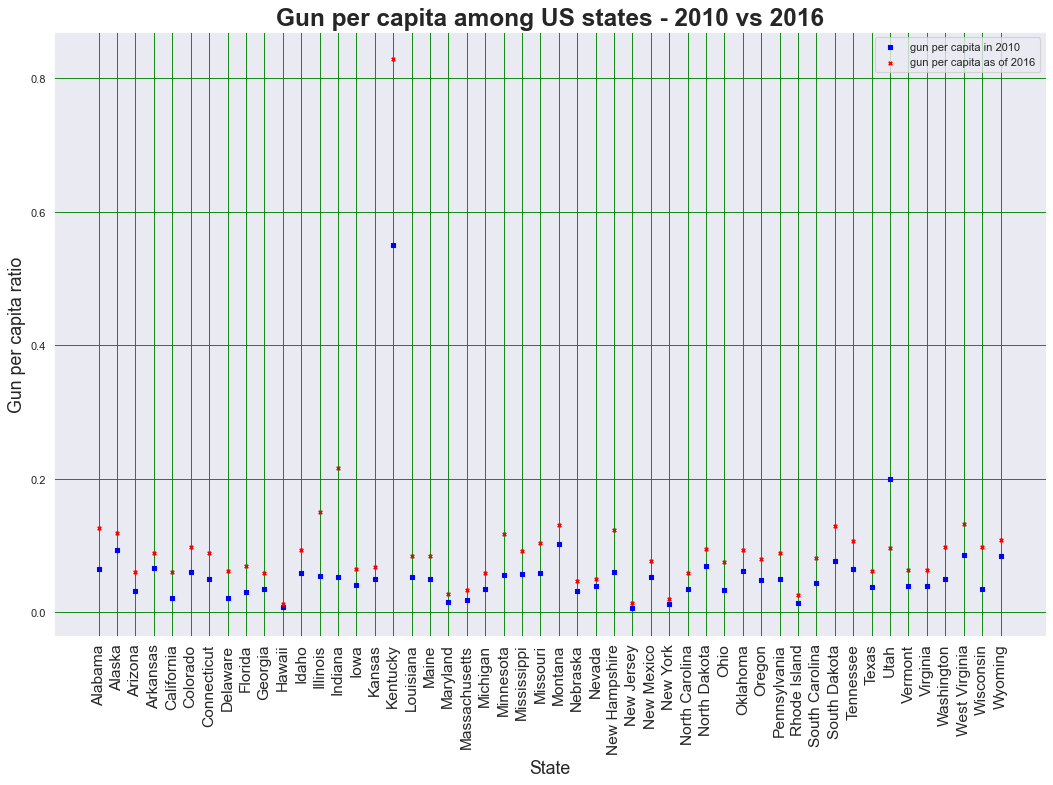

In [226]:
fig = plt.figure(figsize=(16, 10),dpi=80)
ax1 = fig.add_subplot(111)

ax1.scatter(masterdf.index,masterdf['gun_per_capita10'], s=10, c='b', marker="s", label='gun per capita in 2010')
ax1.scatter(masterdf.index,masterdf['gun_per_capita16'], s=10, c='r', marker="x", label='gun per capita as of 2016')

plt.title('Gun per capita among US states - 2010 vs 2016',fontsize=22,fontweight='bold')
plt.ylabel('Gun per capita ratio',fontsize=16)
plt.xlabel('State',fontsize='16')
plt.grid(color='green', linestyle='-')

plt.xticks(rotation=90,fontsize='14')


plt.legend(loc='upper right')
plt.show();

<center> Figure 4: Difference between guns per capita 2010 and guns per capita 2016 for each state</center>

**OBSERVATIONS:**
- Upon examining figure 4, Kentucky has the highest gun per capita ratio during 2010 and 2016, which is expected given that Kentucky has the highest number of permits granted by NICS (figure 2 proves this).
- The largest increase in gun per capita also occurred in Kentucky.
- The top 3 states in terms of gun per capita is Kentucky, Indiana and Illinois. 
- Generally, there is an increase in the gun per capita ratio for almost all of the states.
- Utah was the only exception among all states where a **decrease** in gun per capita took place.

<a id='conclusions'></a>
## Conclusions

The datasets investigated covered the period from 1998 up to 2017, and was useful in providing insights of the trends in gun purchases and requests made to the NICS across the United States. The main aim was to reveal how the demographic and geographic factors influenced the number of firearm purchases. Datasets were merged by their shared attribute which was the state column.


It is important to note that were some limitations in both datasets. A common constraint was the quality issues found that came in the form of completeness as there was a lot of missing data. Missing data was filled by zeros, which is not ideal though was necessary to be able to conduct mathematical operations using columns. Additionally, a this report could have been improved by adding statistical analysis that would have confirmed whether or not correlations are true.

All in all, it was found that purchase requests for all kinds of guns is in an upward trajectory and has been continuously increasing since 1998 up until 2016. 
- There was a sudden drop in purchases in the year 2017 for all gun types. Moreover, buyers usually preferred buying long guns during the period of 1998-2013. However, the demand for handguns rised and surpassed that of long guns starting in 2014 until 2017. 
- Data shows that Kentucky has the highest number of gun permits of all time issued by NICS.
- There were indications that there are less buyers holding a bachelor's degree at the time of purchase, although this is not sufficient to imply causation.
- Generally, gun per capita ratio increased in all states between the period of 2010 until 2016, with the exception being Utah where gun per capita has dropped.


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])